In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from keras.applications import VGG16
from keras.layers import Dense, Flatten, Input
import numpy as np
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D
from keras.preprocessing.image import ImageDataGenerator

In [2]:
data = np.load('y_img_res.npy')
print(len(data))

1000


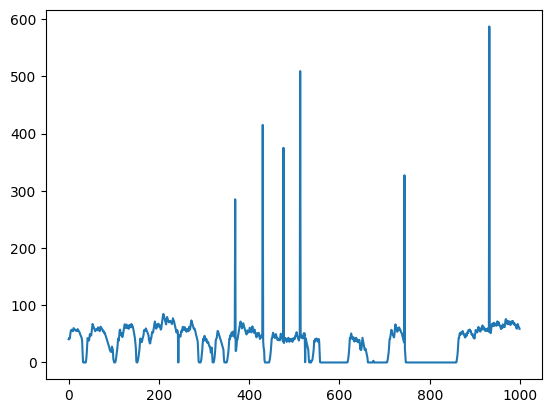

In [3]:
plt.plot(data)

710
27.4


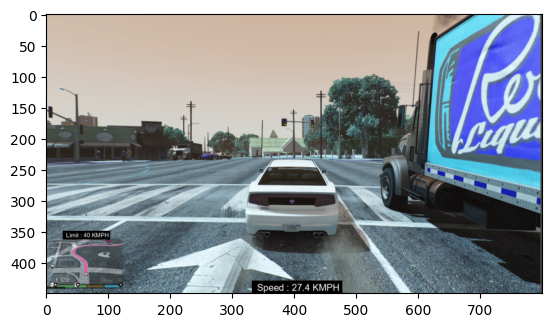

In [4]:
random_index = random.randint(0, data.shape[0]-1)
print(random_index)
print(data[random_index])
img_name = 'img_res/img_{}.png'.format(random_index)
img = cv2.imread(img_name)
plt.imshow(img)

In [5]:
import numpy as np
import glob
from PIL import Image

# directory containing images
directory = 'img_res/'

# npy file containing labels
label_file = 'y_img_res.npy'

# initialize lists to store images and labels
images = []
labels = []

# get list of all images in the directory
for filename in glob.glob(directory + '/*.png'):
    with Image.open(filename) as img:
        # convert image to array and resize
        img = np.array(img.resize((224, 224)))
        images.append(img)

# load labels from npy file
labels = np.load(label_file)

# convert lists to numpy arrays
images = np.array(images)

In [ ]:
# normalize the image data
images = images / 255.0
#normalize labels
labels = labels / 255.0

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# create a sequential model
model = keras.Sequential()

# add a 2D convolutional layer with 32 filters, kernel size 3x3, and ReLU activation
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))

# add a max pooling layer with pool size 2x2
model.add(keras.layers.MaxPooling2D((2, 2)))

# add a flatten layer to convert 3D tensor to 1D array
model.add(keras.layers.Flatten())

# add a dense layer with 64 units and ReLU activation
model.add(keras.layers.Dense(64, activation='relu'))

# add an output layer with a single unit and linear activation
model.add(keras.layers.Dense(1, activation='linear'))

In [ ]:
from keras import backend as K

def accuracy(y_true, y_pred):
    y_pred = K.round(y_pred)
    correct = K.cast(K.equal(y_true, y_pred), 'float32')
    acc = K.mean(correct)
    return acc

In [ ]:
# compile the model with mean squared error loss and stochastic gradient descent optimizer
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[accuracy])

In [ ]:
# train the model on the images and labels
history = model.fit(images, labels, epochs=10, batch_size=16, validation_split=0.3)

In [ ]:
# Plot the training and validation accuracy/loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save('model.h5')